# Auto Insurance Claim Fraud Indicators and Classification

# Mary Donovan Martello

## The goal of this project was to identify significant features in fraudulent insurance claim transactions and to design predictive classification models to predict whether fraud was reported on the insurance claim transaction. This notebook implements baseline models for each of the four models to use for comparison to enhanced models.

# Part 4:  Baseline Model

### The dataset includes 1,000 prior claim transaction records.  Each record has a mix of 38 quantitative and categorical data features about the claim filed, including information on the policy, insured, and automobile, aspects of the damage incident, and elements of the claim filed.  The dataset also has a feature that indicates whether fraud was reported on each observation (i.e., either Y or N).

In [2]:
dfClaims = pd.read_csv('FradulentInsuranceClaims.csv')

In [3]:
dfClaims.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN


### The dataset includes the original data that was cleaned, prepared, and transformed into Principal Component features in the 1_EDA_Prep notebook.

In [38]:
# import scaled, transformed and PCA df
pcaDF = pd.read_csv('pcaClaimsLog.csv')

# Model Evaluation and Model Selection

> # Phase One: Evaluate Baseline Models

In [37]:
# import libraries for models

import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

import yellowbrick
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')


C:\Users\trave\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Prepare the feature matrix, target vector, train and test data for baseline models.

In [41]:

# separate into input and output columns (X variable for features and y for target variables)
X = pcaDF.drop('fraud_reported', axis = 1) 
y = pcaDF['fraud_reported']


In [47]:
# split the dataset into train and test sets
# random_stateint or RandomState instance, default=None; Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=1)


In [48]:
# one-hot encode input variables
# use ColumnTransformer to indicate which categorical variables to encode
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(XTrain)
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
                                                                        28, 29, 30, 31])], remainder='passthrough')
XTrain = transformer.fit_transform(XTrain)
XTest = transformer.fit_transform(XTest)

In [49]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

### Baseline model (all features): Logistic Regression

In [50]:
# logistic regression baseline
# Instantiate the logistic regression model using default parameters
modelLR = LogisticRegression()

# Fit the model with training data
modelLR.fit(XTrain, yTrain)

# predict on test set
yhat = modelLR.predict(XTest)

# evaluate the baseline with accuracy score
accuracy = accuracy_score(yTest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.61


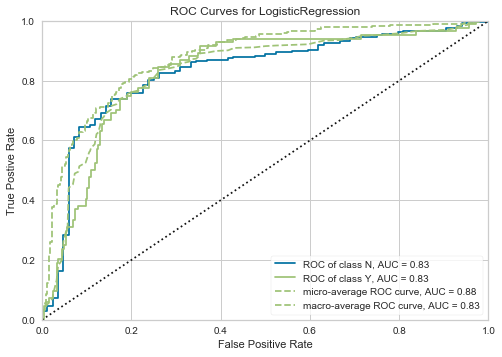

In [51]:
# ROC and AUC
from yellowbrick.classifier import ROCAUC

#Instantiate the visualizer
visualizer = ROCAUC(modelLR)
visualizer.fit(XTrain, yTrain)  # Fit the training data to the visualizer
visualizer.score(XTest, yTest)  # Evaluate the model on the test data
g = visualizer.poof()

### Baseline model (all features): LASSO Logistic Regression

In [52]:
# LASSO logistic regression baseline
# Instantiate the LASSO logistic regression model using default parameters
modelLogLass = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model with training data
modelLogLass.fit(XTrain, yTrain)

# predict on test set
yhat = modelLogLass.predict(XTest)

# evaluate the baseline with accuracy score
accuracy = accuracy_score(yTest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.30


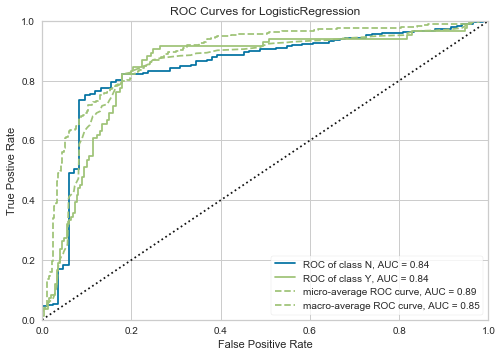

In [53]:
# ROC and AUC
from yellowbrick.classifier import ROCAUC

#Instantiate the visualizer
visualizer = ROCAUC(modelLogLass)
visualizer.fit(XTrain, yTrain)  # Fit the training data to the visualizer
visualizer.score(XTest, yTest)  # Evaluate the model on the test data
g = visualizer.poof()

### Baseline model (all features): SVC

In [54]:
#SVC baseline
# Instantiate the SVC model using default parameters
modelSVC = SVC(kernel='linear')

# Fit the model with training data
modelSVC.fit(XTrain, yTrain)

# predict on test set
yhat = modelSVC.predict(XTest)

# evaluate the baseline with accuracy score
accuracy = accuracy_score(yTest, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.12


### Baseline model (all features): Random Forest

In [57]:
# Random Forest baseline
# Instantiate the logistic regression model using default parameters
modelRF = RandomForestClassifier()

# evaluate the model
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.790 (0.044)


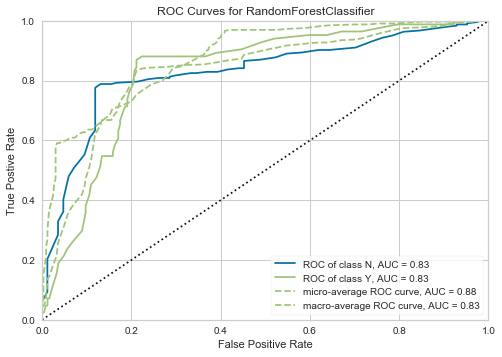

In [58]:
# ROC and AUC
from yellowbrick.classifier import ROCAUC

#Instantiate the visualizer
visualizer = ROCAUC(modelRF)
visualizer.fit(XTrain, yTrain)  # Fit the training data to the visualizer
visualizer.score(XTest, yTest)  # Evaluate the model on the test data
g = visualizer.poof()